In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [11]:
year = dt.timedelta(days=366)

Text(0, 0.5, 'Inches')

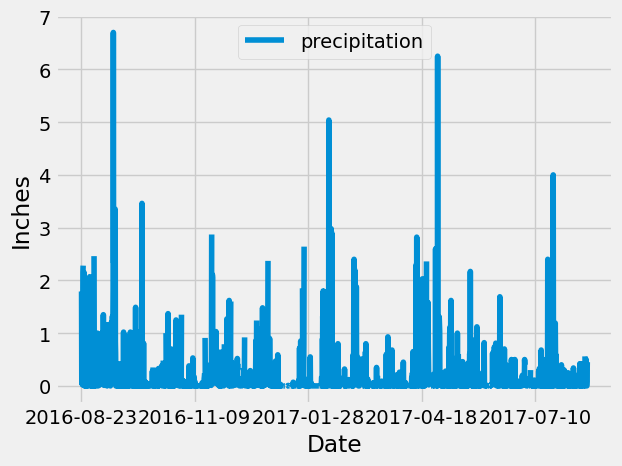

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
order_date = session.query(Measurement.date).order_by(Measurement.date.desc())
# Calculate the date one year from the last date in data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
string = recent_date[0]
r_date_formatted = dt.datetime.strptime(string, '%Y-%m-%d')
one_year_ago = r_date_formatted - year
one_year_ago
# Perform a query to retrieve the data and precipitation scores
query_1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(query_1, columns=["date", "precipitation"])

# Sort the dataframe by date
df_sorted = df.sort_values("date")
df_sorted
# Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot(x="date",y="precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset

station_count = session.query(Station).count()
station_count

9

In [25]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'
most_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active)
most_stats.all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature (Degrees Fahrenheit)')

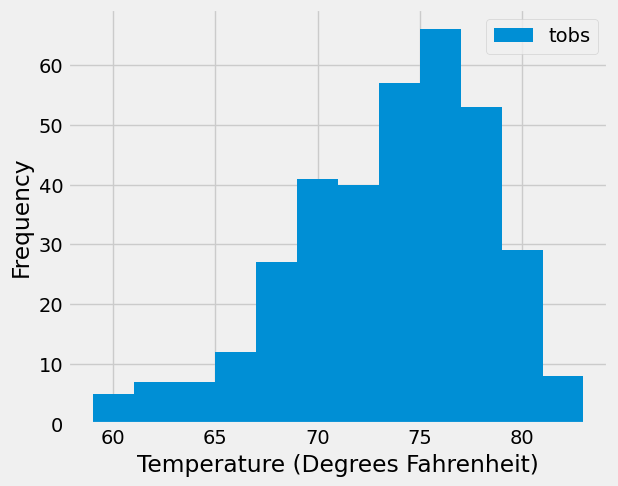

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year = session.query(Measurement.tobs).\
    filter(Measurement.date >= one_year_ago, Measurement.station == most_active).all()

ly_df = pd.DataFrame(last_year, columns=['tobs'])
ly_df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature (Degrees Fahrenheit)")

# Close Session

In [38]:
# Close Session
session.close()